In [1]:
#Partie nettoyage de données

In [2]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_4/dataset_P4/transactions.csv")
transactions=pd.DataFrame(data)


data2 = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_4/dataset_P4/customers.csv")
customers=pd.DataFrame(data2)


data3 = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_4/dataset_P4/products.csv")
products=pd.DataFrame(data3)

In [3]:
print(customers.client_id.describe(), "\n")
print(customers.sex.describe(),"\n")
print(customers.birth.describe(),"\n")

#aucun doublon parmis les clients
#Il n'y a que des F et des M parmis les sexes
#Toutes les années sont comprises entre 1929 et 2004

count       8623
unique      8623
top       c_1623
freq           1
Name: client_id, dtype: object 

count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object 

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64 



In [4]:
customers["age"]=2023-customers.birth
print(customers.age.describe(),"\n")

#Il n'y a aucun client mineur ou agé de 100 ans ou plus

count    8623.000000
mean       44.719123
std        16.919535
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64 



In [5]:
print(products.id_prod.describe(),"\n")
print(products.price.describe(),"\n")
print(products.categ.describe(),"\n")

#Il n'y a pas de doublons parmis les id_prod
#Il y a au moins un prix négativ, c'est une anomalie

count       3287
unique      3287
top       0_1322
freq           1
Name: id_prod, dtype: object 

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64 

count    3287.000000
mean        0.370246
std         0.615387
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: categ, dtype: float64 



In [6]:
print(products.price[products.price<0])
print("\nIl y a un produit à prix négatif\n")
products.price=products.price[products.price>0]
products=products.dropna()
print(products.price[products.price<0])

731   -1.0
Name: price, dtype: float64

Il y a un produit à prix négatif

Series([], Name: price, dtype: float64)


In [7]:
print(products.categ[(products.categ==0) | (products.categ==1) | (products.categ==2)].count().sum())
print(products.categ.count().sum())
#Il y a 3286 résultats, tous les produits sont bien de catégorie 0, 1 ou 2

3286
3286


In [8]:
df_merge=pd.merge(transactions,products,how="left")
df_produit_inconnu=df_merge[df_merge.price.isna()==True]
print(df_produit_inconnu.head())
print(df_produit_inconnu.groupby(df_produit_inconnu.id_prod).count())

print("\nLe produit 0_2245 a été acheté 103 fois alors qu'il n'est pas répertorié dans la liste des produits")
print("\n200 achats test ont été effectués sur le produit T_0 qui n'est pas répertorié dans la liste des produits")

products=products[products.id_prod!="0_2245"]
products=products.dropna()
products=products.reset_index()

     id_prod                             date session_id client_id  price  \
1431     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1    NaN   
2365     T_0  test_2021-03-01 02:30:02.237446        s_0      ct_1    NaN   
2895     T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1    NaN   
5955     T_0  test_2021-03-01 02:30:02.237441        s_0      ct_0    NaN   
6235  0_2245       2021-06-17 03:03:12.668129    s_49705    c_1533    NaN   

      categ  
1431    NaN  
2365    NaN  
2895    NaN  
5955    NaN  
6235    NaN  
         date  session_id  client_id  price  categ
id_prod                                           
0_2245    103         103        103      0      0
T_0       200         200        200      0      0

Le produit 0_2245 a été acheté 103 fois alors qu'il n'est pas répertorié dans la liste des produits

200 achats test ont été effectués sur le produit T_0 qui n'est pas répertorié dans la liste des produits


In [9]:
print(transactions.id_prod.describe(),"\n")
print(transactions.date.describe(),"\n")
print(transactions.session_id.describe(),"\n")
print(transactions.client_id.describe(),"\n")

#On remarque une date marquée d'un "test" au début comme vu précédement
#On remarque qu'un client a acheté 12855 produits

count     337016
unique      3266
top        1_369
freq        1081
Name: id_prod, dtype: object 

count                              337016
unique                             336855
top       test_2021-03-01 02:30:02.237413
freq                                   13
Name: date, dtype: object 

count     337016
unique    169195
top          s_0
freq         200
Name: session_id, dtype: object 

count     337016
unique      8602
top       c_1609
freq       12855
Name: client_id, dtype: object 



In [10]:
print(transactions.date[transactions.date<"2021-01-01 00:00:00.000000"])
print(transactions.date[transactions.date>"2023-01-01 00:00:00.000000"])
print(transactions.date[transactions.date>"A"])
print("200 transactions étaient un test")


transactions.date=transactions.date[transactions.date>"2021-01-01 00:00:00.000000"]
transactions.date=transactions.date[transactions.date<"2023-01-01 00:00:00.000000"]
transactions=transactions.dropna()

Series([], Name: date, dtype: object)
1431      test_2021-03-01 02:30:02.237420
2365      test_2021-03-01 02:30:02.237446
2895      test_2021-03-01 02:30:02.237414
5955      test_2021-03-01 02:30:02.237441
7283      test_2021-03-01 02:30:02.237434
13745     test_2021-03-01 02:30:02.237443
20470     test_2021-03-01 02:30:02.237442
22347     test_2021-03-01 02:30:02.237412
26359     test_2021-03-01 02:30:02.237439
26407     test_2021-03-01 02:30:02.237426
26814     test_2021-03-01 02:30:02.237447
27161     test_2021-03-01 02:30:02.237434
32675     test_2021-03-01 02:30:02.237438
34387     test_2021-03-01 02:30:02.237443
36700     test_2021-03-01 02:30:02.237437
38779     test_2021-03-01 02:30:02.237450
39224     test_2021-03-01 02:30:02.237429
40476     test_2021-03-01 02:30:02.237435
47170     test_2021-03-01 02:30:02.237430
48425     test_2021-03-01 02:30:02.237443
54813     test_2021-03-01 02:30:02.237412
56373     test_2021-03-01 02:30:02.237446
57261     test_2021-03-01 02:30:02.237

In [11]:
transactions_2=transactions.client_id
transactions_2=transactions_2.groupby(transactions_2).count()
transactions_2=transactions_2.sort_values() 
print(transactions_2.tail())  #nombre d'achats effectués par client
#On repère que les clients c_4958, c_3454, c_6714 et c_1609 ont tous fait plus de 2500 achats en moins de 2 ans. Il faudra les 
# retirer dans certaines analyses


client_id
c_7959      195
c_4958     2562
c_3454     3275
c_6714     4473
c_1609    12855
Name: client_id, dtype: int64


In [12]:
df_merge2=pd.merge(transactions,customers,how="left")
df_client_inconnu=df_merge2[df_merge2.sex.isna()==True]
print(df_client_inconnu)
#Tous les clients présent dans les transactions sont répertoriés dans le fichier client

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, sex, birth, age]
Index: []


In [13]:
print(transactions.session_id.groupby(transactions.session_id>"s").count())
print(transactions.session_id.groupby(transactions.session_id<"u").count())
#Pas d'irrégularité dans les session_id

session_id
True    336816
Name: session_id, dtype: int64
session_id
True    336816
Name: session_id, dtype: int64


In [14]:
transactions["date"]=pd.to_datetime(transactions.date)
transactions.dtypes
print(transactions.date.dt.week.head())

print(transactions.date[transactions.date.dt.day>31])
print(transactions.date[transactions.date.dt.day<0])
print(transactions.date[transactions.date.dt.month>12])
print(transactions.date[transactions.date.dt.month<0],"\n")


print(transactions.date[transactions.date.dt.month==2][transactions.date.dt.day>28])
print(transactions.date[transactions.date.dt.month==4][transactions.date.dt.day>30])
print(transactions.date[transactions.date.dt.month==6][transactions.date.dt.day>30])
print(transactions.date[transactions.date.dt.month==9][transactions.date.dt.day>30])
print(transactions.date[transactions.date.dt.month==11][transactions.date.dt.day>30],"\n")


print(transactions.date[transactions.date.dt.time>dt.time(23,59,59)],"\n")
print(transactions.date[transactions.date.dt.time<dt.time(00,00,1)])

#Pas d'erreur sur les dates

0    14
1     5
2    38
3    41
4    28
Name: date, dtype: int64
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns]) 

Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns]) 

69038    2021-09-20 23:59:59.967839
85130    2021-05-20 23:59:59.504233
111335   2021-11-14 23:59:59.012216
131966   2021-08-19 23:59:59.127000
137751   2021-08-24 23:59:59.666497
138509   2021-07-09 23:59:59.604769
318624   2021-07-10 23:59:59.414026
Name: date, dtype: datetime64[ns] 

20614    2021-05-18 00:00:00.174343
49499    2021-11-19 00:00:00.242853
61770    2021-08-01 00:00:00.433085
334086   2021-06-27 00:00:00.014676
Name: date, dtype: datetime64[ns]


In [15]:
#Partie analyse

Il y a 2308 produits de catégorie 0
Il y a 739 produits de catégorie 1
Il y a 239 produits de catégorie 2


<function matplotlib.pyplot.show(*args, **kw)>

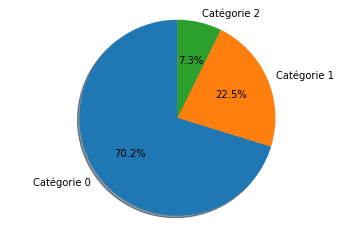

In [16]:
print("Il y a "+ str(int(products["categ"].groupby(products.categ[products.categ==0]).count())) +" produits de catégorie 0")
print("Il y a "+ str(int(products["categ"].groupby(products.categ[products.categ==1]).count())) +" produits de catégorie 1")
print("Il y a "+ str(int(products["categ"].groupby(products.categ[products.categ==2]).count())) +" produits de catégorie 2")

labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
sizes = [int(products["categ"].groupby(products.categ[products.categ==0]).count()),int(products["categ"].groupby(products.categ[products.categ==1]).count()),int(products["categ"].groupby(products.categ[products.categ==2]).count())]

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show

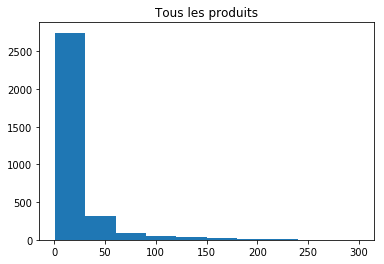

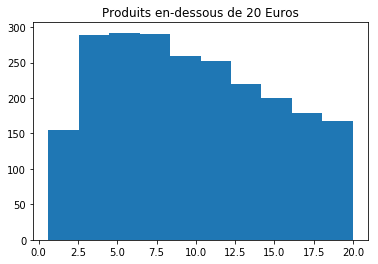

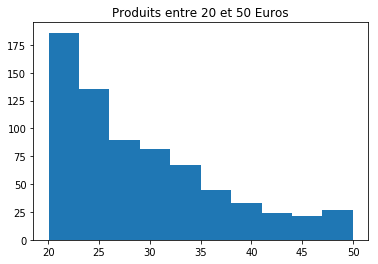

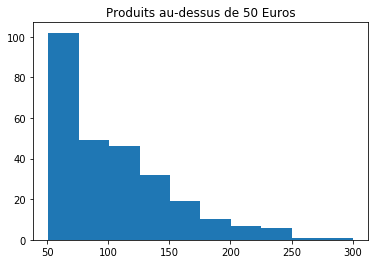

In [17]:
fig, ax = plt.subplots()
ax.hist(products.price)
plt.title('Tous les produits')
plt.show()

products_over_50=products[products.price>50]
products_20_50=(products[products.price<50])
products_under_20=products[products.price<20]

products_20_50=products_20_50[products_20_50.price>20]
products_20_50=products_20_50.dropna()

products_over_50=products_over_50.reset_index()
products_20_50=products_20_50.reset_index()
products_under_20=products_under_20.reset_index()

fig, ax = plt.subplots()
ax.hist(products_under_20.price)
plt.title('Produits en-dessous de 20 Euros')
plt.show()

fig, ax = plt.subplots()
ax.hist(products_20_50.price)
plt.title('Produits entre 20 et 50 Euros')
plt.show()

fig, ax = plt.subplots()
ax.hist(products_over_50.price)
plt.title('Produits au-dessus de 50 Euros')
plt.show()

In [18]:
print("La moyenne des prix est de : ",products['price'].mean())
print("La valeur médiane est : ",products['price'].median())
print("La tendance centrale ou le mode est : ", float(products['price'].mode()))

print("\nLa moyenne des prix est de : ",products_under_20['price'].mean())
print("La valeur médiane est : ",products_under_20['price'].median())
print("La tendance centrale ou le mode est : ", float(products_under_20['price'].mode()))

print("\nLa moyenne des prix est de : ",products_20_50['price'].mean())
print("La valeur médiane est : ",products_20_50['price'].median())
print("La tendance centrale ou le mode est : ", float(products_20_50['price'].mode()))

print("\nLa moyenne des prix est de : ",products_over_50['price'].mean())
print("La valeur médiane est : ",products_over_50['price'].median())
print("La tendance centrale ou le mode est : ", float(products_over_50['price'].mode()))

La moyenne des prix est de :  21.863597078514857
La valeur médiane est :  13.075
La tendance centrale ou le mode est :  4.99

La moyenne des prix est de :  9.825644811116112
La valeur médiane est :  9.22
La tendance centrale ou le mode est :  4.99

La moyenne des prix est de :  29.423436619718405
La valeur médiane est :  26.99
La tendance centrale ou le mode est :  22.99

La moyenne des prix est de :  103.75340659340686
La valeur médiane est :  89.54
La tendance centrale ou le mode est :  50.99


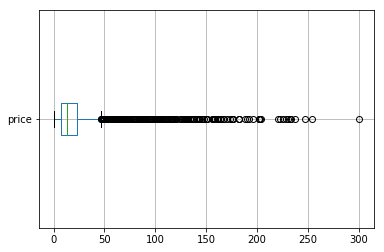

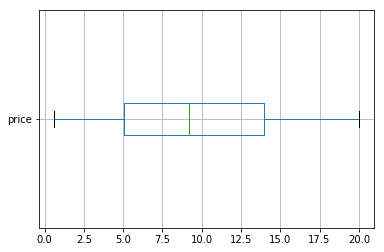

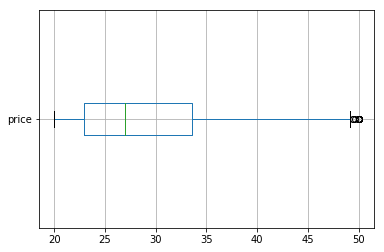

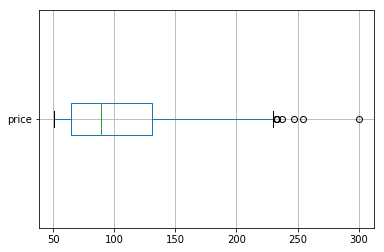

In [19]:
products.boxplot(column="price", vert=False)
plt.show()

products_under_20.boxplot(column="price", vert=False)
plt.show()

products_20_50.boxplot(column="price", vert=False)
plt.show()

products_over_50.boxplot(column="price", vert=False)
plt.show()

Series([], Name: categ, dtype: int64)
Aucun produit de catégorie 2 ne coûte moins de 20 Euros


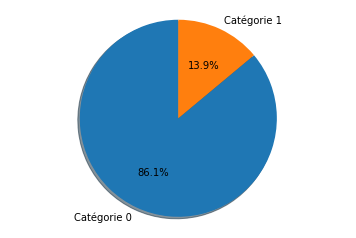

In [20]:
labels = 'Catégorie 0', 'Catégorie 1'
sizes = [int(products_under_20["categ"].groupby(products_under_20.categ[products_under_20.categ==0]).count()),int(products_under_20["categ"].groupby(products_under_20.categ[products_under_20.categ==1]).count())]

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show

print(products_under_20.categ[products_under_20.categ==2])
print("Aucun produit de catégorie 2 ne coûte moins de 20 Euros")

<function matplotlib.pyplot.show(*args, **kw)>

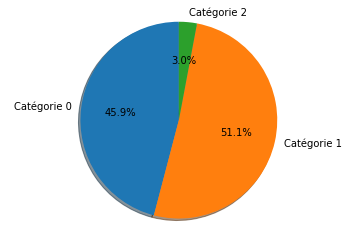

In [21]:
labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
sizes = [int(products_20_50["categ"].groupby(products_20_50.categ[products_20_50.categ==0]).count()),int(products_20_50["categ"].groupby(products_20_50.categ[products_20_50.categ==1]).count()),int(products_20_50["categ"].groupby(products_20_50.categ[products_20_50.categ==2]).count())]

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show

Series([], Name: categ, dtype: int64)
Aucun produit de catégorie 0 ne coûte plus de 50 Euros


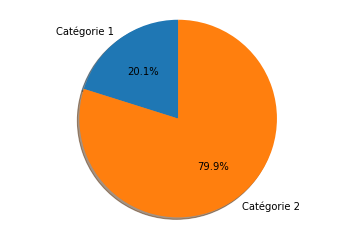

In [22]:
labels = 'Catégorie 1', 'Catégorie 2'
sizes = [int(products_over_50["categ"].groupby(products_over_50.categ[products_over_50.categ==1]).count()),int(products_over_50["categ"].groupby(products_over_50.categ[products_over_50.categ==2]).count())]

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.savefig('PieChart01.png')
plt.show

print(products_over_50.categ[products_over_50.categ==0])
print("Aucun produit de catégorie 0 ne coûte plus de 50 Euros")

In [23]:
print("Il y a " , int(products.groupby(products.categ).count().price.loc[0]), "produits de catégorie 0 dont", int(products_under_20.groupby(products_under_20.categ).count().price.loc[0]), "à moins de 20Euros et", int(products_20_50.groupby(products_20_50.categ).count().price.loc[0]) ,"entre 20 et 50 Euros")
print("Il y a " , int(products.groupby(products.categ).count().price.loc[1]), "produits de catégorie 1 dont", int(products_under_20.groupby(products_under_20.categ).count().price.loc[1]), "à moins de 20Euros,", int(products_20_50.groupby(products_20_50.categ).count().price.loc[1]) ,"entre 20 et 50 Euros et",int(products_over_50.groupby(products_over_50.categ).count().price.loc[1]),"au delà de 50 Euros" )
print("Il y a " , int(products.groupby(products.categ).count().price.loc[2]), "produits de catégorie 2 dont", int(products_under_20.groupby(products_20_50.categ).count().price.loc[2]), "entre 20 et 50 Euros et", int(products_over_50.groupby(products_over_50.categ).count().price.loc[2]) ,"au delà de 50 Euros")

Il y a  2308 produits de catégorie 0 dont 1982 à moins de 20Euros et 326 entre 20 et 50 Euros
Il y a  739 produits de catégorie 1 dont 321 à moins de 20Euros, 363 entre 20 et 50 Euros et 55 au delà de 50 Euros
Il y a  239 produits de catégorie 2 dont 21 entre 20 et 50 Euros et 218 au delà de 50 Euros


In [24]:
print("Le minimum des produits de catégorie 0 est :",products.price[products.categ==0].sort_values().min())
print("Le maximum des produits de catégorie 0 est :",products.price[products.categ==0].sort_values().max())
print("\nLe minimum des produits de catégorie 1 est :",products.price[products.categ==1].sort_values().min())
print("Le maximum des produits de catégorie 1 est :",products.price[products.categ==1].sort_values().max())
print("\nLe minimum des produits de catégorie 2 est :",products.price[products.categ==2].sort_values().min())
print("Le maximum des produits de catégorie 2 est :",products.price[products.categ==2].sort_values().max())

Le minimum des produits de catégorie 0 est : 0.62
Le maximum des produits de catégorie 0 est : 40.99

Le minimum des produits de catégorie 1 est : 2.0
Le maximum des produits de catégorie 1 est : 80.99

Le minimum des produits de catégorie 2 est : 30.99
Le maximum des produits de catégorie 2 est : 300.0


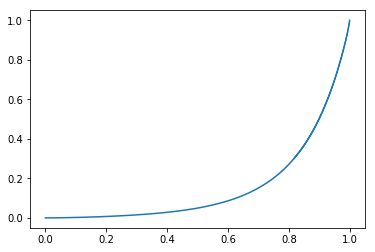

0.6902366694430301

20% des produits représentent 80% des produits vendus


In [25]:
transactions2021=transactions[transactions.date.dt.year==2021]
transactions2022=transactions[transactions.date.dt.year==2022]
transactions_produits=pd.merge(transactions2021,products,how="left")
transactions_tout=pd.merge(transactions_produits,customers,how="left")

lorenz = np.cumsum(np.sort(transactions_tout.id_prod.groupby(transactions_tout.id_prod).count()) / transactions_tout.id_prod.groupby(transactions_tout.id_prod).count().sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.show()


aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)

print("\n20% des produits représentent 80% des produits vendus")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


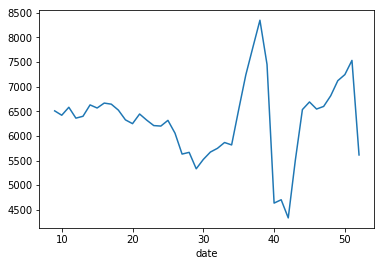

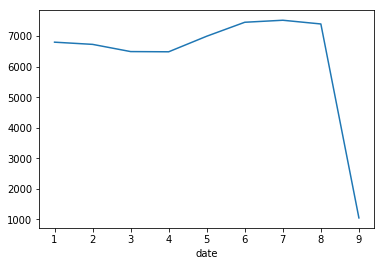

In [26]:
transactions2021.session_id.groupby(transactions2021.date.dt.week).count().plot()
transactions2021.date=transactions2021.date[transactions2021.date.dt.week<53]
plt.show()

transactions2022.date=transactions2022.date[transactions2022.date.dt.week<11]
transactions2022.session_id.groupby(transactions2022.date.dt.week).count().plot()
plt.show()

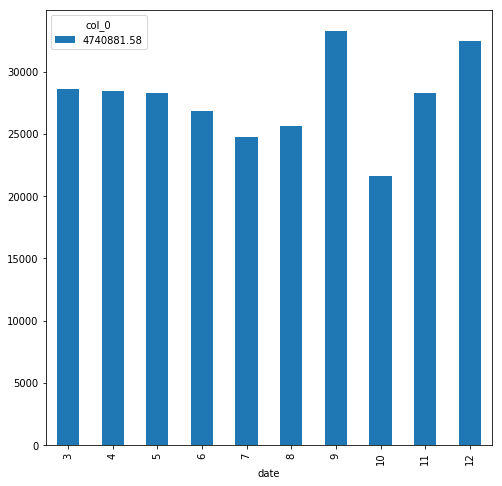

In [27]:
carat_table = pd.crosstab(index=transactions_produits.date.dt.month,
                          columns=transactions_produits.price.sum())


carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

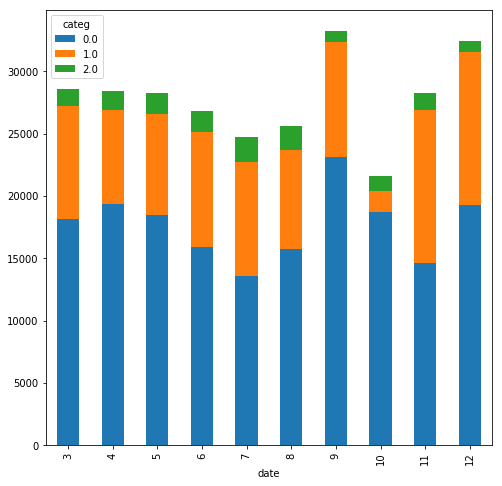

In [28]:
carat_table = pd.crosstab(index=transactions_produits.date.dt.month,
                          columns=transactions_produits.categ)


carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

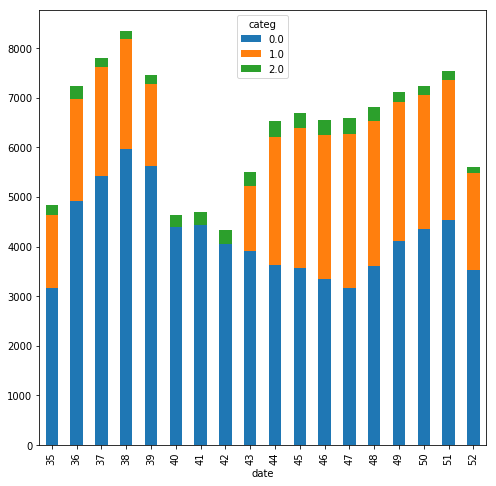

In [29]:
carat_table = pd.crosstab(index=transactions_produits.date.dt.week[transactions_produits.date.dt.month > 8],
                          columns=transactions_produits.categ)


carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

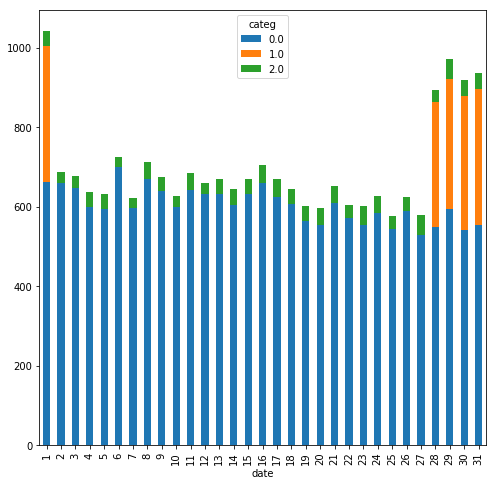

In [30]:
carat_table = pd.crosstab(index=transactions_produits.date.dt.day[transactions_produits.date.dt.month==10],
                          columns=transactions_produits.categ)


carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

On remarque qu'il n'y a aucune vente du 2 au 27


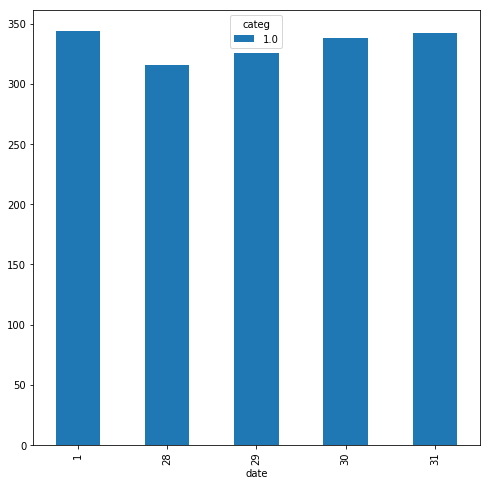

In [31]:
carat_table = pd.crosstab(index=transactions_tout.date.dt.day[transactions_tout.date.dt.month==10],
                          columns=transactions_tout.categ[transactions_tout.categ==1])


carat_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

print("On remarque qu'il n'y a aucune vente du 2 au 27")

In [32]:
age_groupe=[]
age_test=customers["age"]

for i in age_test :
    if i<30 :
        age_groupe.append(20)
    elif 30<= i <= 39 :
        age_groupe.append(30)
    elif 40<= i <= 49 :
        age_groupe.append(40)
    elif 50<= i <= 59 :
        age_groupe.append(50)
    elif 60<= i <= 69 :
        age_groupe.append(60)
    elif 70<= i <= 79 :
        age_groupe.append(70)
    elif 80<= i <= 89 :
        age_groupe.append(80)
    elif i>89 :
        age_groupe.append(90)
   
        
        
age_groupe=pd.DataFrame(age_groupe)
customers["age_groupe"]=age_groupe
transactions_tout=pd.merge(transactions_tout,customers,how="left")
print(transactions_tout.head())

  id_prod                       date session_id client_id   index  price  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450  1897.0   4.99   
1   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270   221.0  10.71   
2  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597   446.0   4.20   
3  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242  1024.0   8.99   
4  0_1085 2021-09-15 05:47:48.215162    s_90139    c_2526  1869.0   3.99   

   categ sex  birth  age  age_groupe  
0    0.0   f   1977   46          40  
1    1.0   f   1979   44          40  
2    0.0   m   1963   60          60  
3    0.0   f   1980   43          40  
4    0.0   f   1982   41          40  


In [33]:
#Partie recherche de corrélations

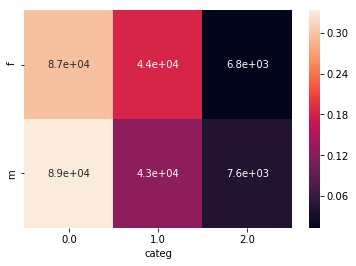

2768.0616319135393
0.0


In [34]:
X = "sex"
Y = "categ"

c = transactions_tout[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = transactions_tout[X].value_counts()
ty = transactions_tout[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data)
cont


tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data)
indep = tx.dot(ty.T) / n

c = c.fillna(0)
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)
plt.show()

from scipy.stats import chi2_contingency

V=transactions_tout[X].value_counts()
W=transactions_tout[Y].value_counts()
obs=cont
chi2, p, dof, expected = st.chi2_contingency(obs)
print (chi2)
print (p)
#Hypothèse H0 : On suppose les variables sexe et catégorie d'être indépendantes. P value = 0%  < 5%  on rejette donc l'hypothèse. Les deux variables sont corrélées

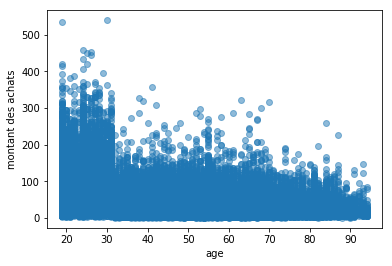

0.3388886032649182
SpearmanrResult(correlation=0.34620377687930026, pvalue=0.0)


In [35]:
plt.plot(transactions_tout.age.groupby(transactions_tout.session_id).mean(),transactions_tout.price.groupby(transactions_tout.session_id).sum(),'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant des achats")
plt.show()




print(st.pearsonr(transactions_tout.age.groupby(transactions_tout.session_id).mean(),-transactions_tout.price.groupby(transactions_tout.session_id).sum())[0])
print(st.spearmanr(transactions_tout.age.groupby(transactions_tout.session_id).mean(),-transactions_tout.price.groupby(transactions_tout.session_id).sum()))
#Hypothèse H0 : On suppose les variables âge et montant des achats d'être indépendantes. P value = 0%  < 5%  on rejette donc l'hypothèse. Les deux variables sont corrélées

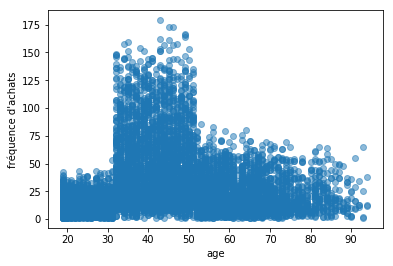

-0.02469561183885214
SpearmanrResult(correlation=-0.12621799613693305, pvalue=8.614354986383228e-32)


In [36]:
transactions_drop=transactions_tout[transactions_tout.client_id!="c_4958"]
transactions_drop=transactions_drop[transactions_drop.client_id!="c_3454"]
transactions_drop=transactions_drop[transactions_drop.client_id!="c_6714"]
transactions_drop=transactions_drop[transactions_drop.client_id!="c_1609"]


plt.plot(transactions_drop.age.groupby(transactions_drop.client_id).mean(), transactions_drop.client_id.groupby(transactions_drop.client_id).count(),'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("fréquence d'achats")
plt.show()

print(st.pearsonr(transactions_drop.age.groupby(transactions_drop.client_id).mean(),-transactions_drop.client_id.groupby(transactions_drop.client_id).count())[0])
print(st.spearmanr(transactions_drop.age.groupby(transactions_drop.client_id).mean(),-transactions_drop.client_id.groupby(transactions_drop.client_id).count()))
#Hypothèse H0 : On suppose les variables âge et fréquence d'achat d'être indépendantes. P value = 8.614354986383228e-32%  < 5%  on rejette donc l'hypothèse. Les deux variables sont corrélées

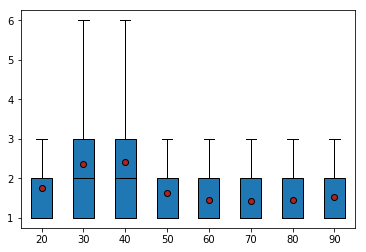

0.20033407869284361
SpearmanrResult(correlation=0.2441759897471839, pvalue=0.0)


In [37]:
df_1=pd.DataFrame({"age":transactions_drop.age_groupe.tolist(),"session_id":transactions_drop.session_id.tolist()})
df_2=pd.DataFrame({"session_id":transactions_drop.session_id.tolist()})
df_1=df_1.age.groupby(df_1.session_id).mean()
df_2=df_2.session_id.groupby(df_2.session_id).count()
df_3=pd.DataFrame({"age":df_1.tolist(),"session_id":df_2.tolist()})
df_3=df_3.dropna()
df_3=df_3.reset_index()
df_3=df_3.drop(columns="index")


X = "age"
Y = "session_id"

sous_echantillon = df_3.copy()

modalites = [20, 30, 40, 50, 60, 70, 80, 90]

groupes = []
for a in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==a][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

print(st.pearsonr(df_3.age,-df_3.session_id)[0])
print(st.spearmanr(df_3.age,-df_3.session_id))

#Hypothèse H0 : On suppose les variables âge et taille de panier moyen d'être indépendantes. P value = 0%  < 5%  on rejette donc l'hypothèse. Les deux variables sont corrélées

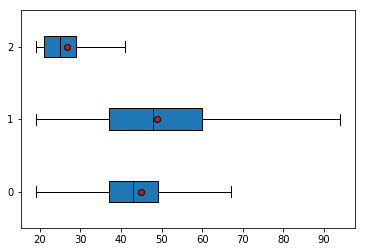

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     sous_echantillon[X]   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     1983.
Date:                 Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                         10:40:19   Log-Likelihood:            -2.2733e+05
No. Observations:               258635   AIC:                         4.547e+05
Df Residuals:                   258633   BIC:                         4.547e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5813      0.004    147.462      0.000       0.574       0.589
sous_echantillon[Y]    -0.0037   8.35e-05    -44.531      0.000      -0.004      -0.004
==============================================================================
Omnibus:                    30848.015   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43307.005
Skew:                           1.000   Prob(JB):                         0.00
Kurtosis:                       2.852   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X = "categ"
Y = "age" 
transactions_drop.categ=transactions_drop.categ[(transactions_drop.categ==0) | (transactions_drop.categ==1) | (transactions_drop.categ==2)]
transactions_drop.categ=transactions_drop.categ.dropna()
transactions_drop.age=transactions_drop.age.dropna()


sous_echantillon = transactions_drop.copy()

modalites = [0,1,2]
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('sous_echantillon[X] ~ sous_echantillon[Y]', data=sous_echantillon).fit()
results.summary()
#Hypothèse H0 : On suppose les variables âge et catégorie d'être indépendantes. P value = 0%  < 5%  on rejette donc l'hypothèse. Les deux variables sont corrélées